**Problem 1**

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?
b) Estimate the mean and the variance of the sum.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.preprocessing import StandardScaler
path='PatientData.csv'

Mean: 0.247159554219
Variance: 7.28830286121


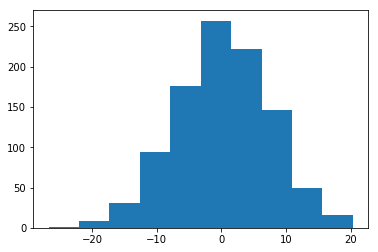

In [8]:
set1 = np.random.normal(-10, 5, 1000)
set2 = np.random.normal(10, 5, 1000)

setSum = np.add(set1, set2)

mean = np.mean(setSum)
variance = np.std(setSum)

print('Mean: ' + str(mean))
print('Variance: ' + str(variance))
plt.hist(setSum)
plt.show()

**Problem 2**

Let $X_{i}$ be an iid Bernoulli random variable with value {-1,1}. Look at the random variable $Z_{n}=\frac{1}{n}∑X_{i}$. By taking 1000 draws from $Z_{n}$, plot its histogram. Check that for small n (say, 5-10) $Z_{n}$ does not look that much like a Gaussian, but when n is bigger (already by the time n= 30 or 50) it looks much more like a Gaussian.  Check also for much bigger n: n= 250, to see that at this point, one can really see the bell curve.

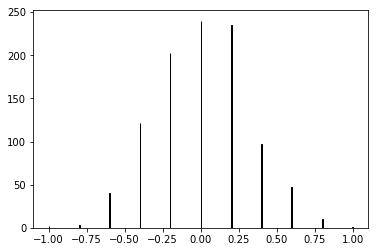

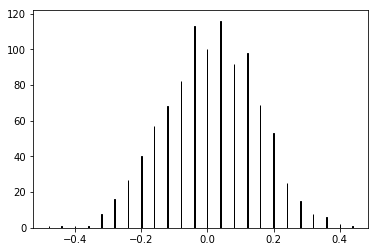

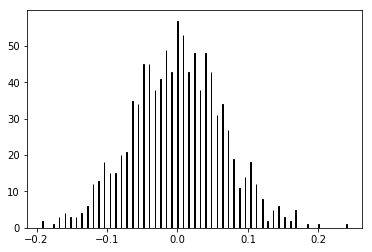

In [12]:
def plot_zn(n):
    draws = 1000
    zn_samples = []

    for i in range(draws):
        sample = 0

        # Create a draw of size n
        for j in range(n):
            # Result of a single trial of the i.i.d. Xi.
            value = np.random.binomial(1, 0.5)

            # Mapping trial failure to -1 to match distribution of Xi.
            sample += -1 if value == 0 else 1

        sample /= float(n)
        zn_samples.append(sample)

    # Set bins to large number to effectively show differences from varying sample sizes
    plt.hist(zn_samples, bins=500, histtype='bar', ec='black')
    plt.show()

plot_zn(10)
plot_zn(50)
plot_zn(250)

**Problem 3**

Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

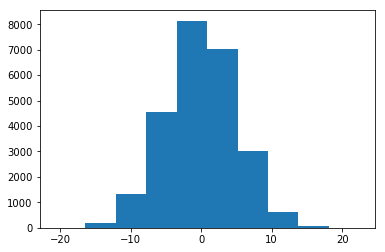

Mean: -0.00278936093565
[-0.01546664  6.07611475  3.3997802  ..., -0.32775485 -3.0162669
  2.51934697]
[-0.01267728  6.07890411  3.40256956 ..., -0.32496549 -3.01347753
  2.52213633]
[  1.60713511e-04   3.69530752e+01   1.15774796e+01 ...,   1.05602570e-01
   9.08104685e+00   6.36117168e+00]
24.8388118368
Standard Deviation: 4.98385511796


In [9]:
set1 = np.random.normal(0, 5, 25000)
plt.hist(set1)
plt.show()

npset = np.array(set1)

avg = np.sum(npset)/25000

print("Mean: " + str(avg))
print(npset)
npset -= avg
print(npset)
npset = npset**2
print(npset)
avg2 = np.sum(npset)/25000
print(avg2)
std = math.sqrt(avg2)

print("Standard Deviation: " + str(std))

**Problem 4**

Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution

$\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}20 & 0.8\\0.8 & 30\end{array}\right)\biggr)$.

Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [11]:
num_samples = 10000
mean = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]

x, y = np.random.multivariate_normal(mean, cov, num_samples).T

mean_x = np.sum(x) / float(num_samples)
mean_y = np.sum(y) / float(num_samples)

mean = [mean_x, mean_y]

# cov = ∑((xi - mean_x)(yi - mean_y)) / (num_samples - 1)
numerator = np.sum((x - mean_x)*(y - mean_y))
denominator = num_samples - 1

cov = numerator / denominator

var_x = np.sum(((x - mean_x) ** 2)) / (num_samples - 1)
var_y = np.sum(((y - mean_y) ** 2)) / (num_samples - 1)

# cov_matrix_2d = [[var_x, cov], [cov, var_y]]
cov_matrix_2d = np.array([[var_x, cov], [cov, var_y]])

print "Mean: " + str(mean)
print "Covariance Matrix: " + "\n" + str(cov_matrix_2d)

Mean: [-4.9819390155405978, 4.923528466496653]
Covariance Matrix: 
[[ 19.83510724   0.73886889]
 [  0.73886889  30.43682781]]


**Problem 5** 

Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:
(a) How many patients and how many features are there?
(b) What is the meaning of the first 4 features? See if you can understand what they mean.
(c) Are there missing values? Replace them with the average of the corresponding feature column
(d) How could you test which features strongly influence the patient condition and which do not?

List what you think are the three most important features.

Reference: http://nbviewer.jupyter.org/url/users.ece.utexas.edu/~dimakis/DataScience/DataExploring3.ipynb

In [27]:
df=pd.read_csv(path,header=None,na_values='?')
df.head()
#head() only gives the first 5 rows of the dataframe

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [28]:
df.shape
#Rows = number of patients
#Columns = number of features + condition of patient

(452, 280)

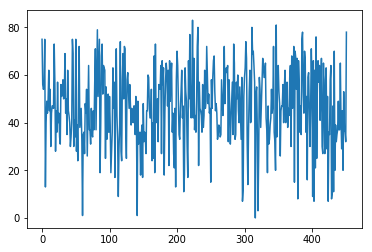

In [30]:
#Plotting the first column as a time series
plt.plot(df[0])

In [31]:
#Checking the top 10 highest values
df[0].value_counts()[:10]

46    15
36    14
37    14
47    14
44    13
35    13
45    13
40    12
50    12
57    12
Name: 0, dtype: int64

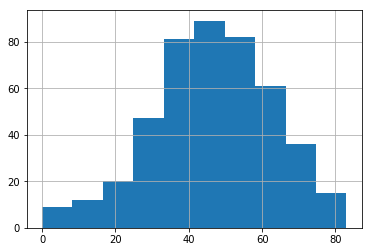

In [35]:
# Always integers, and 46 is the most frequent value, appearing in 15 patients.

#Making a histogram
df[0].hist(bins=10)

In [ ]:
#Observing that the range is from 0-80 and the median is around 45,
# we can conclude that df[0] is the age of the patient!!! Poggers
